In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from skimage.io import imread, imshow
import random
import pydicom
##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.head(5)

## Load 'sample_labels.csv' data for pixel level assessments
#sample_df = pd.read_csv('sample_labels.csv')
#sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
all_xray_df['Patient ID'].count()

112120

In [4]:
all_xray_df['Patient ID'].nunique()

30805

There Total 30805 Patients

In [5]:
## EDA
# Todo 
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

In [6]:
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [7]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11',
       'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [9]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [10]:
len(all_labels)

15

In [11]:
all_xray_df[all_labels].sum()/len(all_xray_df)*100

Atelectasis           10.309490
Cardiomegaly           2.475919
Consolidation          4.162504
Edema                  2.054049
Effusion              11.877453
Emphysema              2.244024
Fibrosis               1.503746
Hernia                 0.202462
Infiltration          17.743489
Mass                   5.156975
No Finding            53.836068
Nodule                 5.646629
Pleural_Thickening     3.019087
Pneumonia              1.276311
Pneumothorax           4.728862
dtype: float64

__Percentage__ wise distribution of all Finding Labels 

Pneumonia case: 1431.0


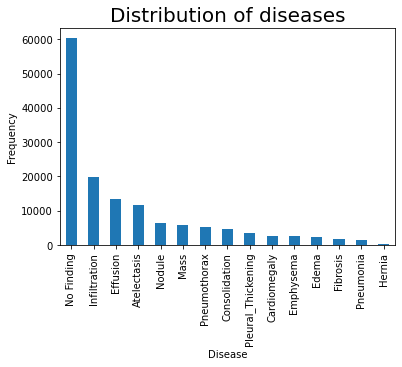

In [12]:
plt.figure()
all_xray_df[all_labels].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Distribution of diseases", fontsize=20)
plt.xlabel("Disease")
plt.ylabel("Frequency")
print("Pneumonia case:", all_xray_df["Pneumonia"].sum())

M    63340
F    48780
Name: Patient Gender, dtype: int64

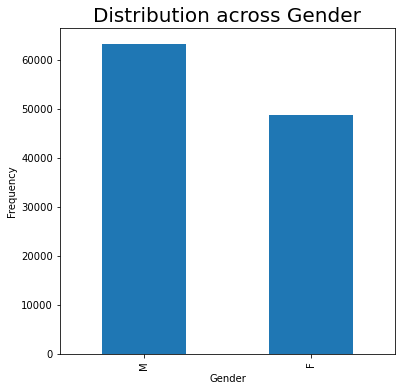

In [13]:
plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')
plt.title("Distribution across Gender", fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Frequency")
all_xray_df['Patient Gender'].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

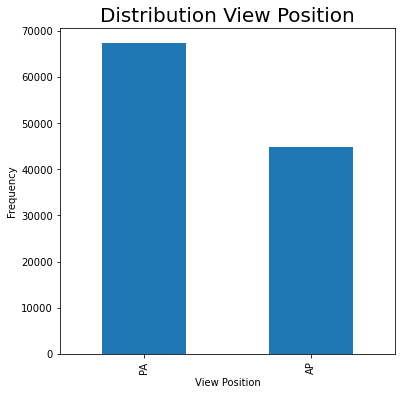

In [44]:
plt.figure(figsize=(6,6))
all_xray_df['View Position'].value_counts().plot(kind='bar')
plt.title("Distribution View Position", fontsize=20)
plt.xlabel("View Position")
plt.ylabel("Frequency")
all_xray_df['View Position'].value_counts()

In [14]:
all_xray_df['Patient Age'] = np.clip(all_xray_df['Patient Age'], 5, 100)

making __Age__ in range of 5 - 100

Text(0, 0.5, 'Frequency')

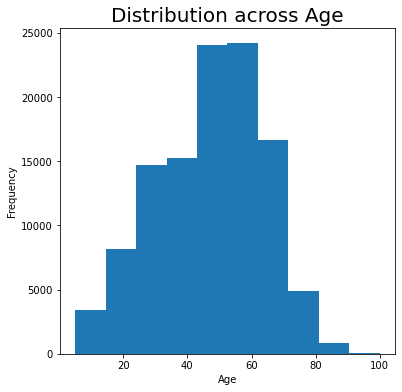

In [15]:
plt.figure(figsize=(6,6))
plt.hist(all_xray_df['Patient Age'])
plt.title("Distribution across Age", fontsize=20)
plt.xlabel("Age")
plt.ylabel("Frequency")

In [16]:
all_xray_df['View Position'].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

In [17]:
all_xray_df[all_xray_df['Finding Labels']=='No Finding']['View Position'].value_counts()

PA    39302
AP    21059
Name: View Position, dtype: int64

In [18]:
all_xray_df[all_xray_df['Finding Labels']=='No Finding']['Patient Gender'].value_counts()

M    33922
F    26439
Name: Patient Gender, dtype: int64

In [19]:
all_xray_df['Pneumonia'].value_counts()

0.0    110689
1.0      1431
Name: Pneumonia, dtype: int64

In [20]:
all_xray_df[all_xray_df['Pneumonia']==1]['Patient Age'].value_counts()

33     40
53     39
58     36
48     34
49     34
       ..
84      1
85      1
90      1
78      1
100     1
Name: Patient Age, Length: 84, dtype: int64

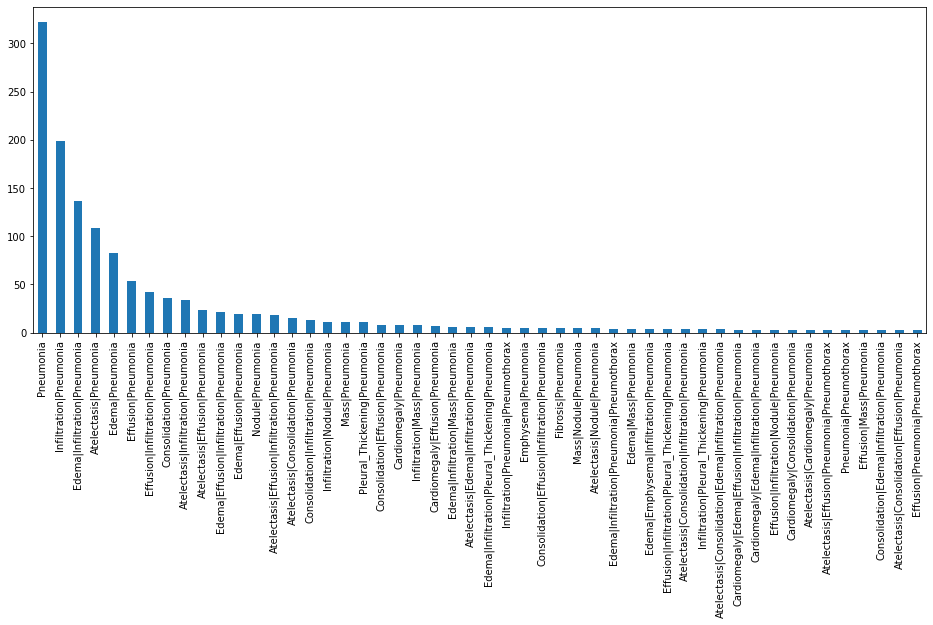

In [21]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:50].plot(kind='bar')

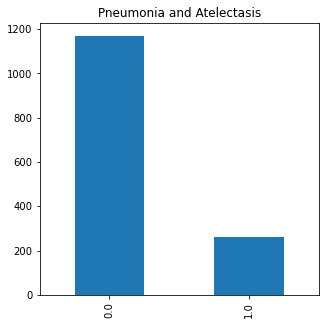

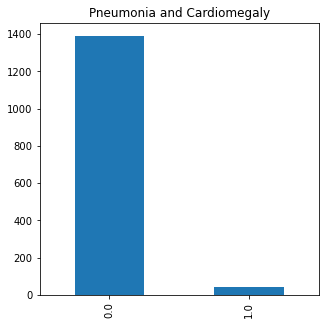

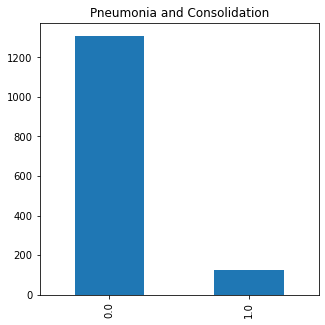

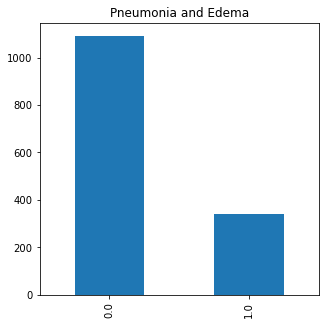

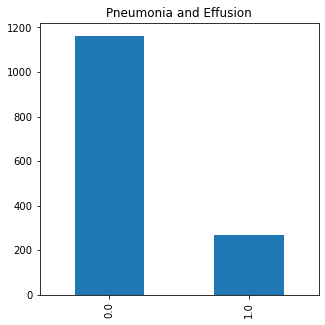

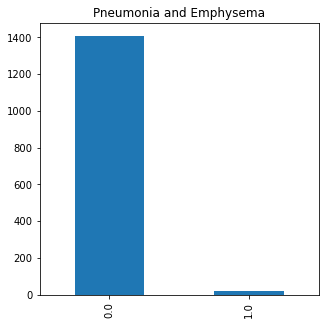

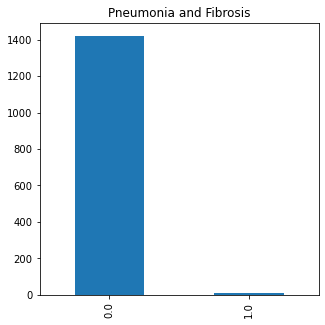

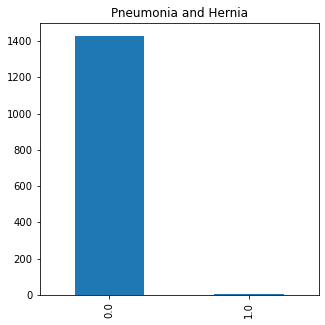

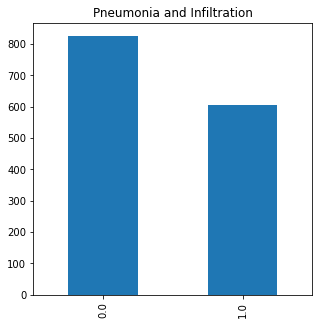

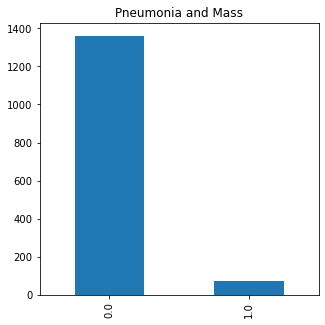

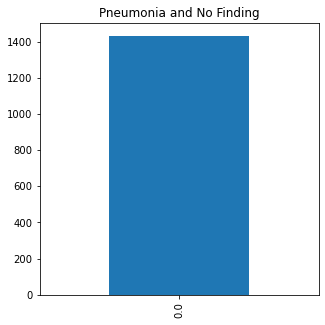

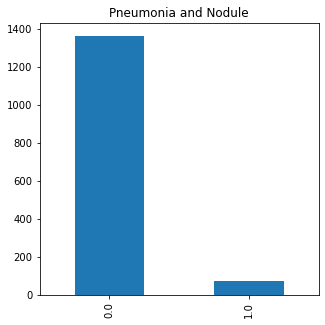

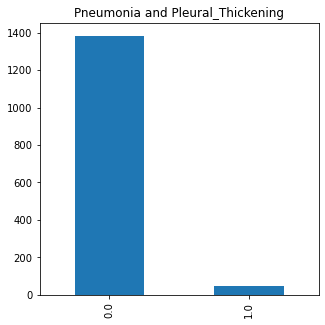

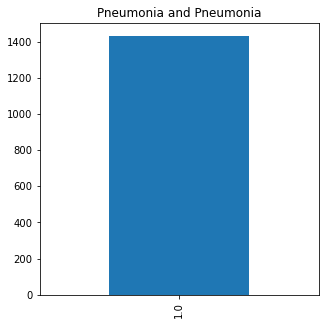

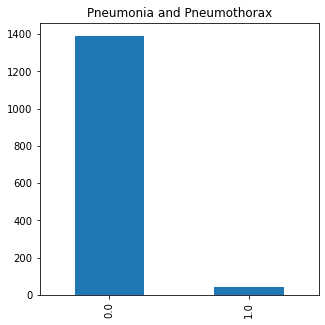

In [22]:
for label in all_labels:
    plt.figure(figsize=(5,5))
    plt.title('Pneumonia and '+label)
    all_xray_df[all_xray_df.Pneumonia==1][label].value_counts().plot(kind='bar')

In [23]:
all_xray_df[all_xray_df['Effusion']==1]['Pneumonia'].value_counts()

0.0    13048
1.0      269
Name: Pneumonia, dtype: int64

In [24]:
all_xray_df[all_xray_df['Atelectasis']==1]['Pneumonia'].value_counts()

0.0    11297
1.0      262
Name: Pneumonia, dtype: int64

In [25]:
for disease in all_labels:
    print(disease)
    print(all_xray_df[disease].value_counts())

Atelectasis
0.0    100561
1.0     11559
Name: Atelectasis, dtype: int64
Cardiomegaly
0.0    109344
1.0      2776
Name: Cardiomegaly, dtype: int64
Consolidation
0.0    107453
1.0      4667
Name: Consolidation, dtype: int64
Edema
0.0    109817
1.0      2303
Name: Edema, dtype: int64
Effusion
0.0    98803
1.0    13317
Name: Effusion, dtype: int64
Emphysema
0.0    109604
1.0      2516
Name: Emphysema, dtype: int64
Fibrosis
0.0    110434
1.0      1686
Name: Fibrosis, dtype: int64
Hernia
0.0    111893
1.0       227
Name: Hernia, dtype: int64
Infiltration
0.0    92226
1.0    19894
Name: Infiltration, dtype: int64
Mass
0.0    106338
1.0      5782
Name: Mass, dtype: int64
No Finding
1.0    60361
0.0    51759
Name: No Finding, dtype: int64
Nodule
0.0    105789
1.0      6331
Name: Nodule, dtype: int64
Pleural_Thickening
0.0    108735
1.0      3385
Name: Pleural_Thickening, dtype: int64
Pneumonia
0.0    110689
1.0      1431
Name: Pneumonia, dtype: int64
Pneumothorax
0.0    106818
1.0      5302
Nam

Text(0.5, 1.0, 'Age distribution for pneumonia cases')

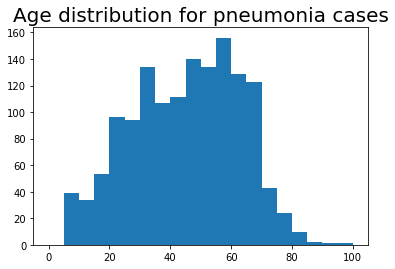

In [26]:
plt.figure()
plt.hist([all_xray_df[all_xray_df["Pneumonia"]==1]["Patient Age"].values], bins = 20, range=[0, 100])
plt.title('Age distribution for pneumonia cases', fontsize=20)

(array([   0.,  341.,  396.,  621., 1153., 1352., 1612., 1252., 1716.,
        2131., 2140., 2496., 1800., 1538.,  789.,  358.,  139.,   42.,
          15.,    3.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

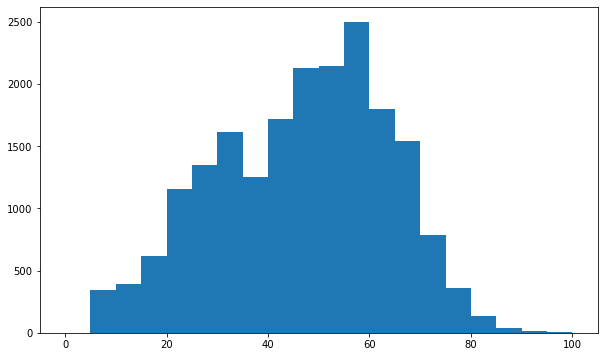

In [27]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Infiltration==1]['Patient Age'], bins = 20, range=[0, 100])

(array([0.000e+00, 8.000e+01, 1.850e+02, 3.200e+02, 5.090e+02, 7.100e+02,
        9.840e+02, 7.030e+02, 1.015e+03, 1.338e+03, 1.529e+03, 2.000e+03,
        1.487e+03, 1.176e+03, 6.790e+02, 4.020e+02, 1.400e+02, 4.200e+01,
        1.700e+01, 1.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

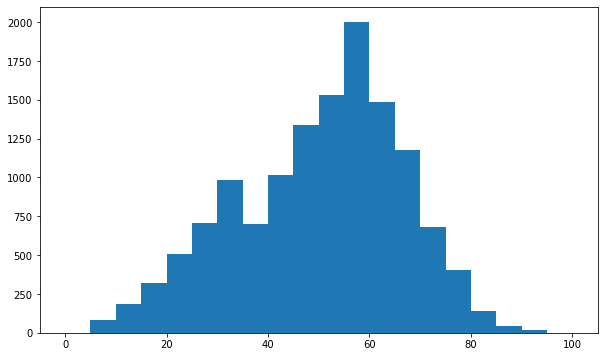

In [28]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Effusion==1]['Patient Age'], bins = 20, range=[0, 100])

In [29]:
all_xray_df.groupby(['Patient ID']).sum()
df = all_xray_df.groupby(['Patient ID'])[all_labels].sum()
df.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Patient ID,,,,,,,,,,,,,,,
1,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0


In [30]:
for label in all_labels:
    df.loc[df[label] > 0, label] = 1
df.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Patient ID,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
diseas_per_patient = df[all_labels].sum(axis=1)
diseas_per_patient.head(10)

Patient ID
1     3.0
2     1.0
3     2.0
4     2.0
5     3.0
6     1.0
7     1.0
8     3.0
9     1.0
10    1.0
dtype: float64

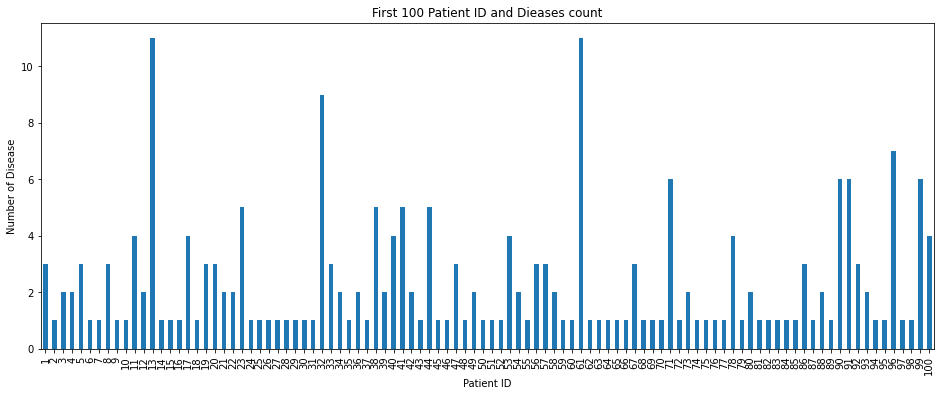

In [32]:
plt.figure(figsize=(16,6))
plt.title('First 100 Patient ID and Dieases count')
plt.ylabel('Number of Disease')
diseas_per_patient[:100].plot(kind='bar')

## Pixel Level Assessment

In [33]:
sample_df = pd.read_csv('sample_labels.csv')

In [34]:
all_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

In [35]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(5)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
6649,00001788_004.png,No Finding,4,1788,47,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_002/images/00001788_004.png
50175,00012687_006.png,Pneumothorax,6,12687,63,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/data/images_006/images/00012687_006.png
11799,00003072_012.png,Infiltration,12,3072,50,M,AP,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_002/images/00003072_012.png
67555,00016699_000.png,Fibrosis,0,16699,72,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_008/images/00016699_000.png
45353,00011624_003.png,No Finding,3,11624,52,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_006/images/00011624_003.png


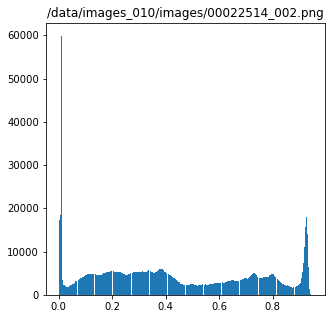

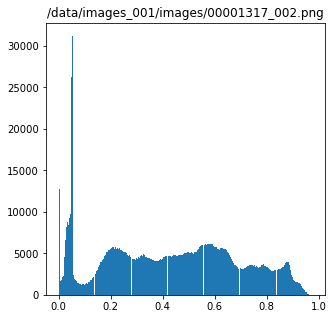

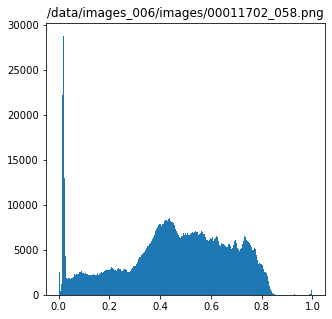

In [37]:
# Pixel distribution of Pneumonia

pnemonia_images = all_xray_df[all_xray_df.Pneumonia==1]['path'].sample(3)
for img_path in pnemonia_images:
    img = plt.imread(img_path)
    plt.figure(figsize=(5,5))
    plt.title(img_path)
    plt.hist(img.ravel(), bins = 256)

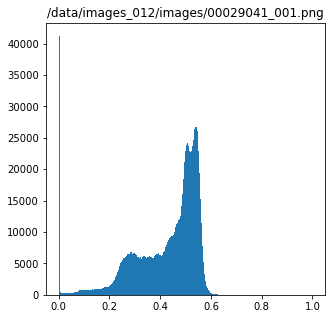

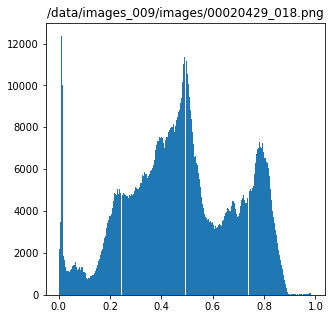

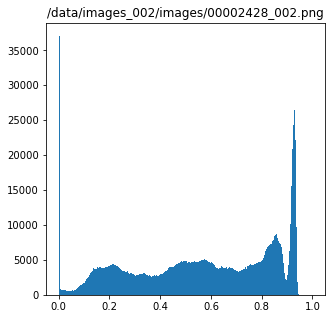

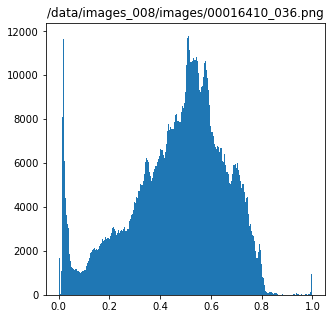

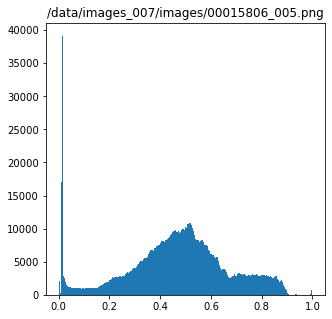

In [38]:
# Pixel distribution of Infiltration

Infiltration_images = all_xray_df[all_xray_df.Infiltration==1]['path'].sample(5)
for img_path in Infiltration_images:
    img = plt.imread(img_path)
    plt.figure(figsize=(5,5))
    plt.title(img_path)
    plt.hist(img.ravel(), bins = 256)

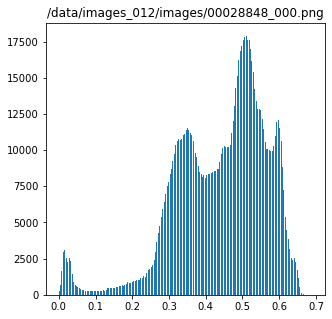

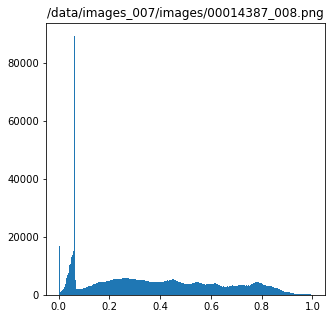

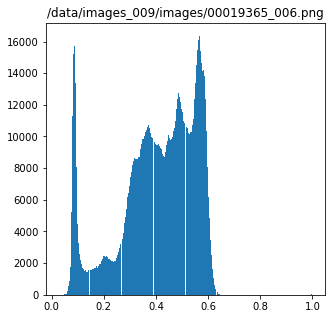

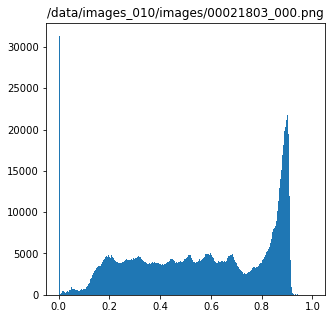

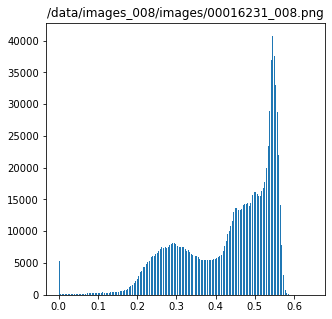

In [39]:
# Pixel distribution of Effusion

Effusion_images = all_xray_df[all_xray_df.Effusion==1]['path'].sample(5)
for img_path in Effusion_images:
    img = plt.imread(img_path)
    plt.figure(figsize=(5,5))
    plt.title(img_path)
    plt.hist(img.ravel(), bins = 256)

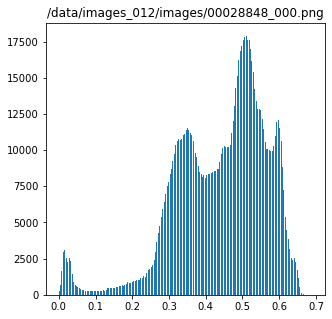

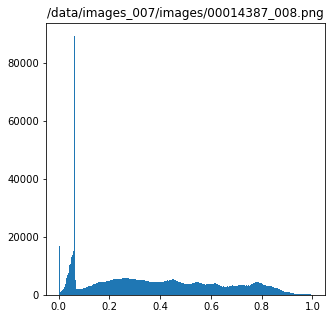

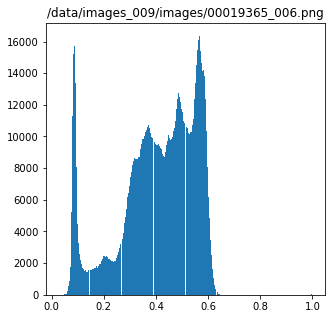

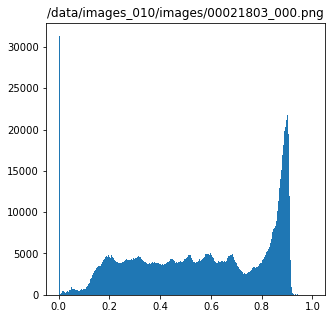

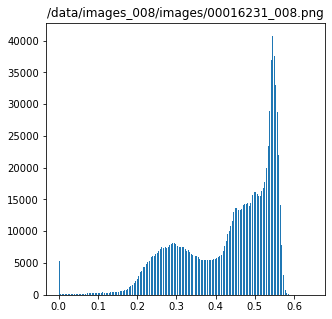

In [40]:
Pneumonia_Effusion_images = all_xray_df[(all_xray_df.Pneumonia==1) & (all_xray_df.Effusion==1)]['path'].sample(5)
for img_path in Effusion_images:
    img = plt.imread(img_path)
    plt.figure(figsize=(5,5))
    plt.title(img_path)
    plt.hist(img.ravel(), bins = 256)

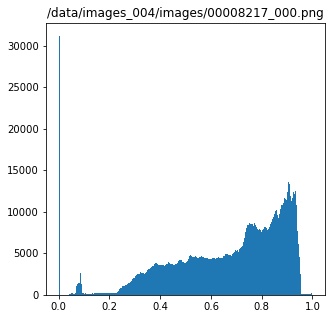

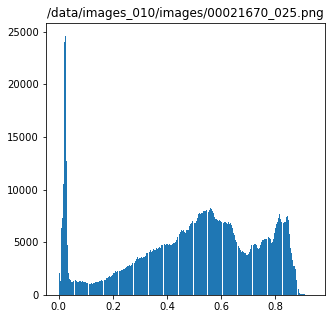

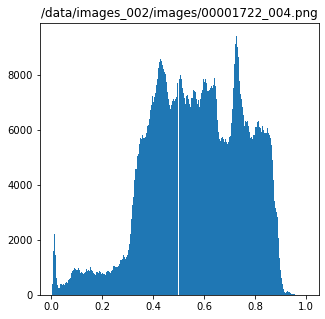

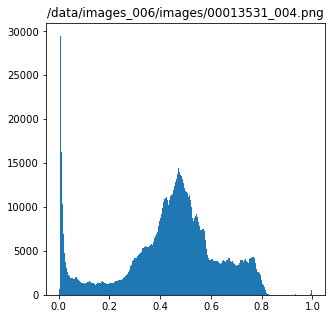

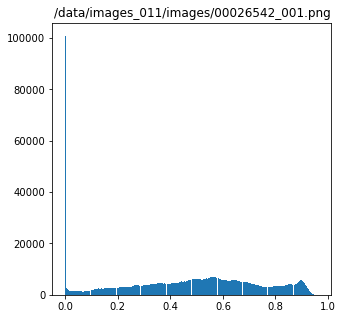

In [41]:
non_pnemonia_images = all_xray_df[all_xray_df.Pneumonia==0]['path'].sample(5)
for img_path in non_pnemonia_images:
    img = plt.imread(img_path)
    plt.figure(figsize=(5,5))
    plt.title(img_path)
    plt.hist(img.ravel(), bins = 256)

In [42]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

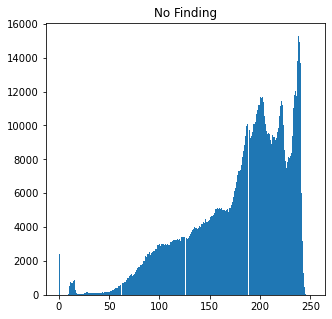

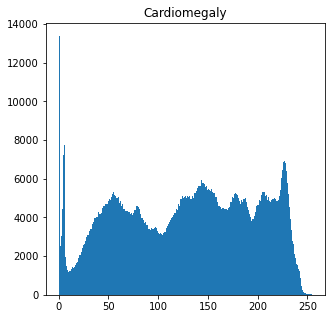

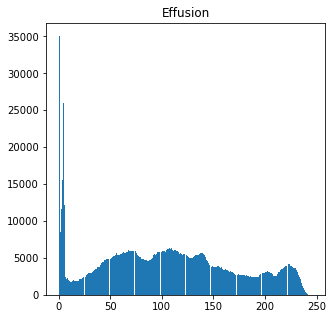

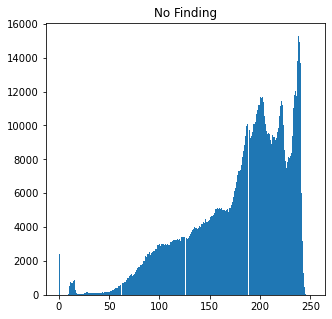

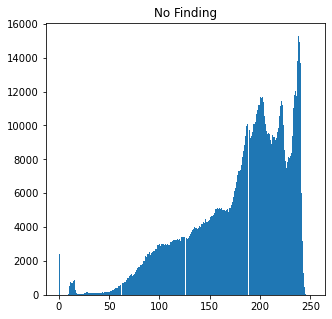

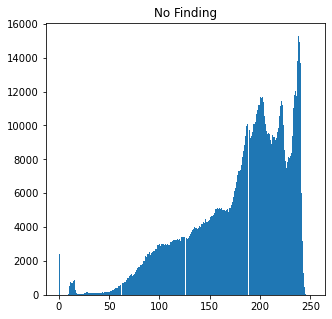

In [43]:
for i in test_dicoms:
    dcm = pydicom.dcmread(i)
    
    #plt.imshow(dcm.pixel_array,cmap='gray')
    plt.figure(figsize=(5,5))
    plt.title(dcm.StudyDescription)
    plt.hist(dcm.pixel_array.ravel(), bins = 256)

- Through Pixel_level assesment we can see that if there is a abnormal peak in between 0.1-0.7, there is chance of pneumonia. While in the case of non_pneumonia there is peak arround 0.8 and other than that there is nonrmal distribution.
- When Pneumonia occurs with other dieases(Effusion) their is abormal spikes in middle range most.
First of all there is different size of images available so to train the model all images must have to be in same size.
All the images have to be normalized and standardize so that variations in sensitivy can be reduced in specific range.
There is biased value in Patient Age, so model cant be set to perticular age. But majority of the cases ranges between 20-65.